<a href="https://colab.research.google.com/github/seplanas/Actividad-5-Extracci-n-de-Caracter-sticas-A01702733/blob/main/Actividad_5_extracci%C3%B3n_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
df = pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [5]:
#Se hace un df solo con las variables que se van a analizar
df = df[['4_number_permanent_employees_last_year',
         '184_store_devices',
         '18_sales_records',
        '232_type_of_store',
         '102_does_the_micro_retailer_sells_fresh_products_',
         '49_inventory_records',
        '210_sales_channels',
         '189_payment_methods',
         '157_frequency_organize_shelves',
        '99_does_the_micro_retailer_exhibits_products_outside_',
         '97_number_of_customers_in_store',
         '268_number_fridges',
         '104_how_many_shelves_does_the_micro_retailer_have',
         '2_current_permanent_employees',
         '20_reviews_finances_monthly',
         '186_internet_connection',
         '145_number_direct_competitors',
         '33_credit_to_customers',
         '60_services',
         '227_agreement_ecommerce_platforms']]

##**Nulos**

In [6]:
valores_nulos=df.isnull().sum()
valores_nulos

4_number_permanent_employees_last_year                   76
184_store_devices                                         2
18_sales_records                                         61
232_type_of_store                                         0
102_does_the_micro_retailer_sells_fresh_products_         0
49_inventory_records                                     61
210_sales_channels                                       89
189_payment_methods                                      64
157_frequency_organize_shelves                           75
99_does_the_micro_retailer_exhibits_products_outside_     0
97_number_of_customers_in_store                           0
268_number_fridges                                        3
104_how_many_shelves_does_the_micro_retailer_have         0
2_current_permanent_employees                            60
20_reviews_finances_monthly                              63
186_internet_connection                                  63
145_number_direct_competitors           

Sustituyo los valores faltantes usando los métodos de backfill y forwardfill dado que las variables son categóricas y no puedo usra un método numérico como lo sería la media o la mediana.

In [7]:
def nulos(valordf):
  df[valordf] = df[valordf].fillna(method='ffill')
  df[valordf] = df[valordf].fillna(method='bfill')

In [ ]:
valordf = ['4_number_permanent_employees_last_year', #bar
         '184_store_devices', #area
         '18_sales_records', #area
        '232_type_of_store', #area
         '102_does_the_micro_retailer_sells_fresh_products_', #pie
         '49_inventory_records', #area
        '210_sales_channels', #area
         '189_payment_methods', #area
         '157_frequency_organize_shelves', #area
        '99_does_the_micro_retailer_exhibits_products_outside_', #pie
         '97_number_of_customers_in_store', #bar
         '268_number_fridges', #bar
         '104_how_many_shelves_does_the_micro_retailer_have', #bar
         '2_current_permanent_employees', #bar
         '20_reviews_finances_monthly', #pie
         '186_internet_connection', #pie
         '145_number_direct_competitors', #bar
         '33_credit_to_customers', #area
         '60_services', #area
         '227_agreement_ecommerce_platforms'] #pie

for i in valordf:
  nulos(i)

In [9]:
valores_nulos=df.isnull().sum()
valores_nulos

4_number_permanent_employees_last_year                   0
184_store_devices                                        0
18_sales_records                                         0
232_type_of_store                                        0
102_does_the_micro_retailer_sells_fresh_products_        0
49_inventory_records                                     0
210_sales_channels                                       0
189_payment_methods                                      0
157_frequency_organize_shelves                           0
99_does_the_micro_retailer_exhibits_products_outside_    0
97_number_of_customers_in_store                          0
268_number_fridges                                       0
104_how_many_shelves_does_the_micro_retailer_have        0
2_current_permanent_employees                            0
20_reviews_finances_monthly                              0
186_internet_connection                                  0
145_number_direct_competitors                           

##**Outliers**

En este caso el tratamiento de outliers como tal no se hace porque son variables categóricas. No se puede aplicar un método estadístico como lo sería la desviación estándar o el rango inter cuartíalico porque no hay números que permitan calcular estas métricas. No obstante se añadirá el snippet de código para cumplir con los requisitos de la actividad.

In [ ]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
#Se generan funciones para poder obtener tanto las gráficas así
#como las tablas de frecuencia

def pie(dfpie):
  #tabla de frecuencia
  table = freq_tbl(df[dfpie])
  #solo nos quedamos con valores mayores a uno
  filtro = table[table['frequency']>1]
  #index de la tabla
  Filtro_index = filtro.set_index(dfpie)
  print(Filtro_index)
  Filtro_index["frequency"].plot(kind='pie', figsize=(10,5),
                                 shadow=True, autopct="%0.1f %%")

def bar(dfbar):
  #tabla de frecuencia
  table = freq_tbl(df[dfbar])
  #solo nos quedamos con valores mayores a uno
  filtro = table[table['frequency']>1]
  #index de la tabla
  Filtro_index = filtro.set_index(dfbar)
  print(Filtro_index)
  Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
  plt.title(dfbar)


def area(dfarea):
  #tabla de frecuencia
  table = freq_tbl(df[dfarea])
  #solo nos quedamos con valores mayores a uno
  filtro = table[table['frequency']>1]
  #index de la tabla
  Filtro_index = filtro.set_index(dfarea)
  print(Filtro_index)
  Filtro_index.plot(kind='area', figsize=(10,4),alpha = 1)


In [15]:
#Se dividen los datos en diferentes dfs para poder usar las funciones previamente definidas

#En df pie van las variables binarias
dfpie = df[['227_agreement_ecommerce_platforms','186_internet_connection',
            '20_reviews_finances_monthly',
            '99_does_the_micro_retailer_exhibits_products_outside_',
            '102_does_the_micro_retailer_sells_fresh_products_'
            ]]

#En df bar van variables con cantidades
#Es importante destacar que aunque son variables numéricas, el hecho de contarlas
#las vuelve categóricas puesto que cuenta por categoría

dfbar = df[['145_number_direct_competitors','2_current_permanent_employees',
            '104_how_many_shelves_does_the_micro_retailer_have',
            '268_number_fridges','97_number_of_customers_in_store',
            '4_number_permanent_employees_last_year']]

#En df area van variables en las que la magnitud es importante
dfarea = df[['60_services','33_credit_to_customers',
             '157_frequency_organize_shelves','189_payment_methods',
             '210_sales_channels','49_inventory_records','232_type_of_store',
             '18_sales_records','184_store_devices']]

In [25]:
# Se convierten los valores dentro de dfbar en valores obj
for i in dfbar:
  df[i] = df[i].astype(object)

                                   frequency  percentage  cumulative_perc
227_agreement_ecommerce_platforms                                        
no                                       155    0.906433         0.906433
yes                                       16    0.093567         1.000000


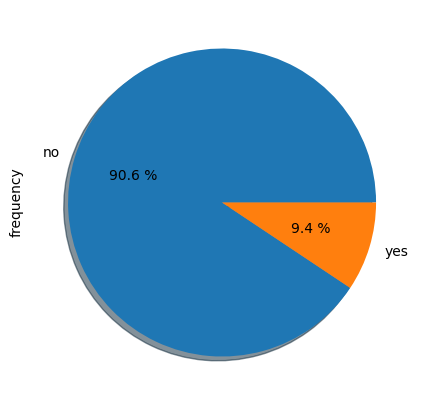

                         frequency  percentage  cumulative_perc
186_internet_connection                                        
yes                            114    0.666667         0.666667
no                              57    0.333333         1.000000


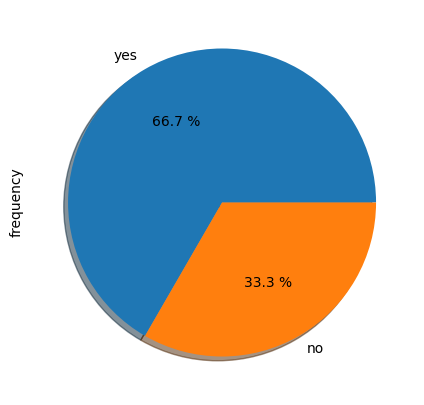

                             frequency  percentage  cumulative_perc
20_reviews_finances_monthly                                        
yes                                120    0.701754         0.701754
no                                  51    0.298246         1.000000


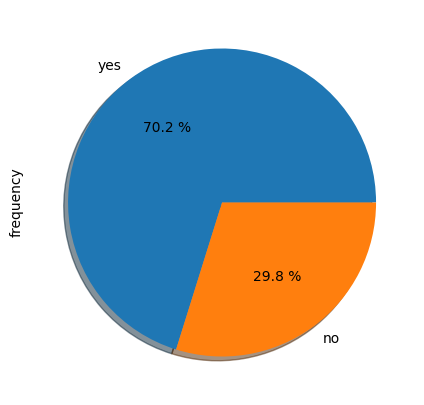

                                                    frequency  percentage  \
99_does_the_micro_retailer_exhibits_products_ou...                          
no                                                        120    0.701754   
yes                                                        51    0.298246   

                                                    cumulative_perc  
99_does_the_micro_retailer_exhibits_products_ou...                   
no                                                         0.701754  
yes                                                        1.000000  


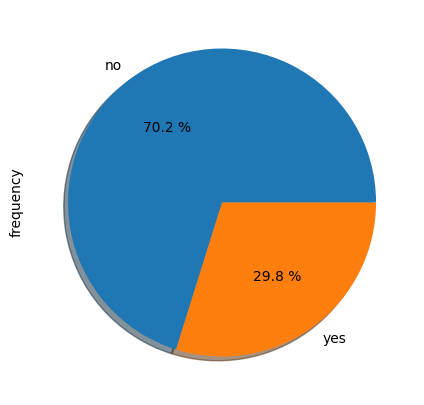

                                                   frequency  percentage  \
102_does_the_micro_retailer_sells_fresh_products_                          
no                                                       105    0.614035   
yes                                                       66    0.385965   

                                                   cumulative_perc  
102_does_the_micro_retailer_sells_fresh_products_                   
no                                                        0.614035  
yes                                                       1.000000  


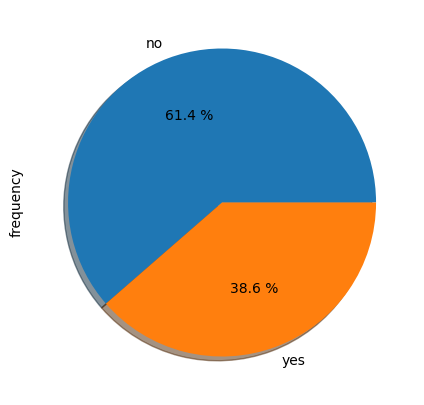

In [19]:
for column in dfpie:
    pie(column)
    plt.show()

                               frequency  percentage  cumulative_perc
145_number_direct_competitors                                        
3.0                                   40    0.233918         0.233918
2.0                                   23    0.134503         0.368421
1.0                                   22    0.128655         0.497076
0.0                                   20    0.116959         0.614035
4.0                                   19    0.111111         0.725146
5.0                                   14    0.081871         0.807018
7.0                                    9    0.052632         0.859649
8.0                                    8    0.046784         0.906433
6.0                                    6    0.035088         0.941520
10.0                                   5    0.029240         0.970760
15.0                                   3    0.017544         0.988304
20.0                                   2    0.011696         1.000000


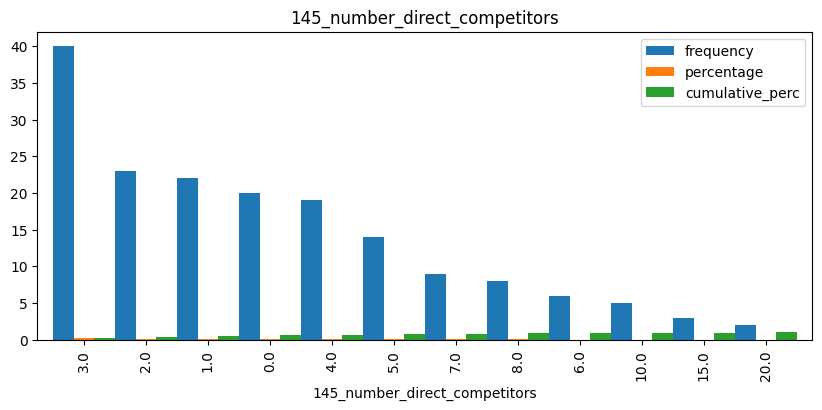

                               frequency  percentage  cumulative_perc
2_current_permanent_employees                                        
1.0                                   52    0.304094         0.304094
0.0                                   45    0.263158         0.567251
2.0                                   36    0.210526         0.777778
3.0                                   16    0.093567         0.871345
4.0                                   15    0.087719         0.959064
5.0                                    5    0.029240         0.988304


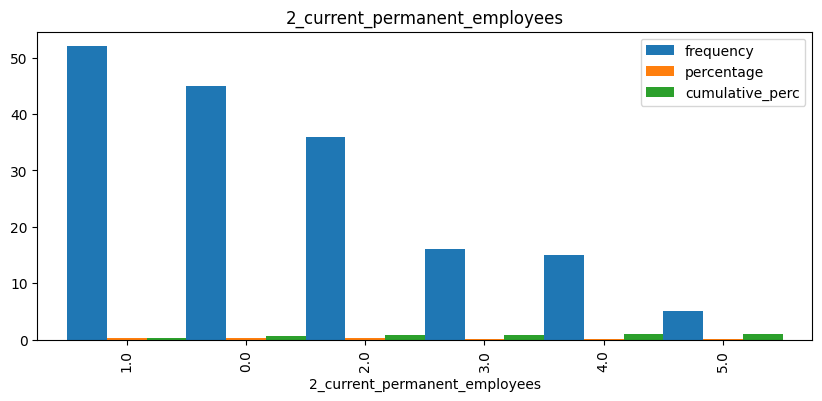

                                                   frequency  percentage  \
104_how_many_shelves_does_the_micro_retailer_have                          
0                                                         26    0.152047   
3                                                         25    0.146199   
1                                                         24    0.140351   
2                                                         18    0.105263   
5                                                         15    0.087719   
6                                                         10    0.058480   
8                                                          9    0.052632   
4                                                          9    0.052632   
7                                                          7    0.040936   
12                                                         6    0.035088   
10                                                         4    0.023392   
24          

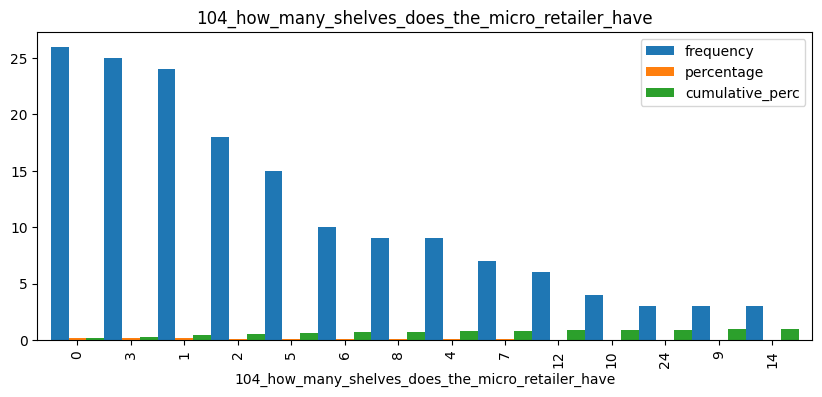

                    frequency  percentage  cumulative_perc
268_number_fridges                                        
0.0                        81    0.473684         0.473684
1.0                        27    0.157895         0.631579
2.0                        25    0.146199         0.777778
3.0                        16    0.093567         0.871345
5.0                         8    0.046784         0.918129
4.0                         4    0.023392         0.941520
6.0                         4    0.023392         0.964912


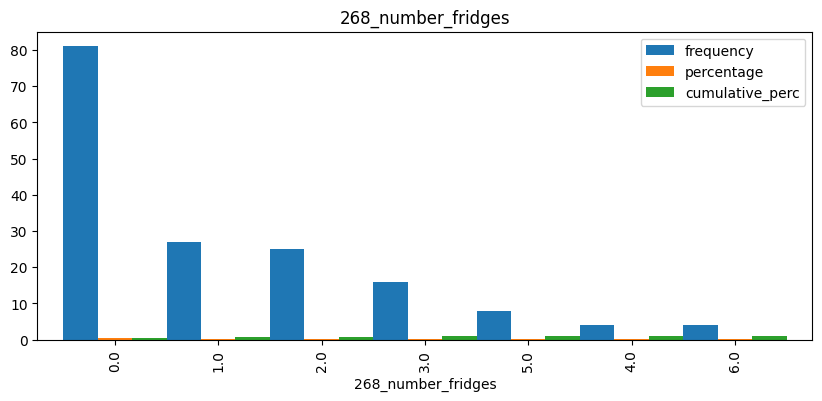

                                 frequency  percentage  cumulative_perc
97_number_of_customers_in_store                                        
0                                       67    0.391813         0.391813
1                                       40    0.233918         0.625731
2                                       33    0.192982         0.818713
3                                       16    0.093567         0.912281
4                                        6    0.035088         0.947368
5                                        4    0.023392         0.970760


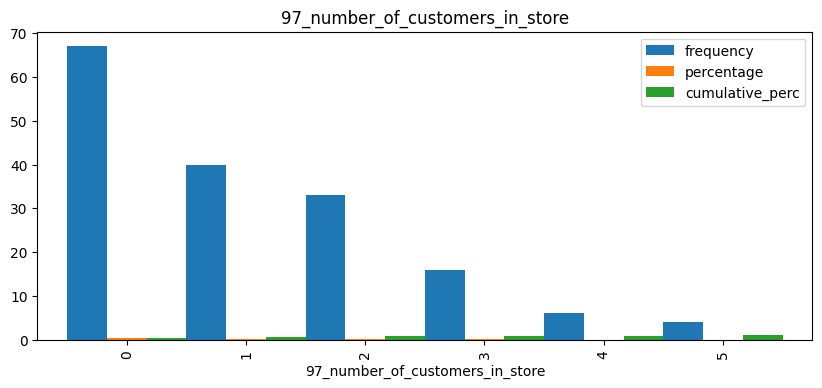

                                        frequency  percentage  cumulative_perc
4_number_permanent_employees_last_year                                        
0.0                                            60    0.350877         0.350877
2.0                                            47    0.274854         0.625731
1.0                                            33    0.192982         0.818713
3.0                                            17    0.099415         0.918129
4.0                                            10    0.058480         0.976608
6.0                                             2    0.011696         0.988304


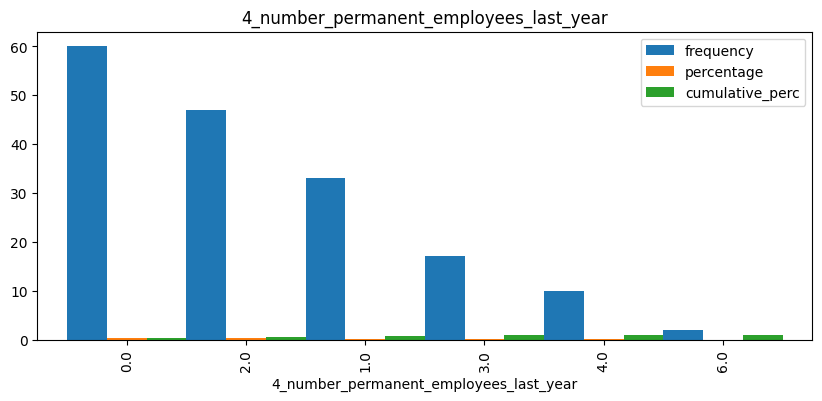

In [26]:
for column in dfbar:
    bar(column)
    plt.show()

                                                    frequency  percentage  \
60_services                                                                 
Ninguno                                                    88    0.514620   
Entrega a domicilio                                        39    0.228070   
Recarga telefónica                                         22    0.128655   
Recepción y entrega de paquetes (e.g. Amazon, M...          6    0.035088   
Pago de servicios públicos (e.g. Yastas),Recarg...          5    0.029240   
Entrega a domicilio,Pago de servicios públicos ...          4    0.023392   
Entrega a domicilio,Recarga telefónica                      2    0.011696   

                                                    cumulative_perc  
60_services                                                          
Ninguno                                                    0.514620  
Entrega a domicilio                                        0.742690  
Recarga telefónica        

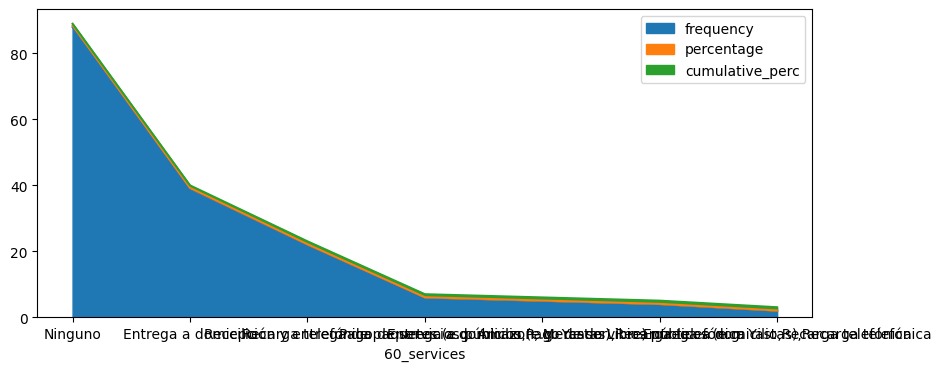

                        frequency  percentage  cumulative_perc
33_credit_to_customers                                        
no                            117    0.684211         0.684211
yes                            54    0.315789         1.000000


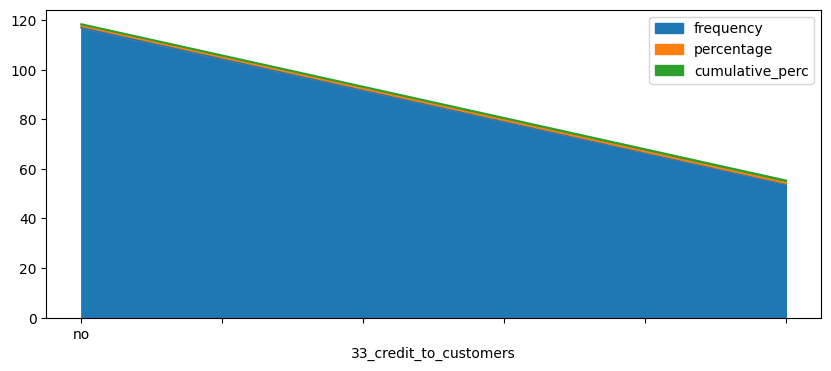

                                frequency  percentage  cumulative_perc
157_frequency_organize_shelves                                        
Diariamente                            67    0.391813         0.391813
Semanalmente                           66    0.385965         0.777778
Nunca                                  16    0.093567         0.871345
Mensualmente                           12    0.070175         0.941520
Quincenalmente                          5    0.029240         0.970760
Semestralmente                          2    0.011696         0.982456
Anualmente                              2    0.011696         0.994152


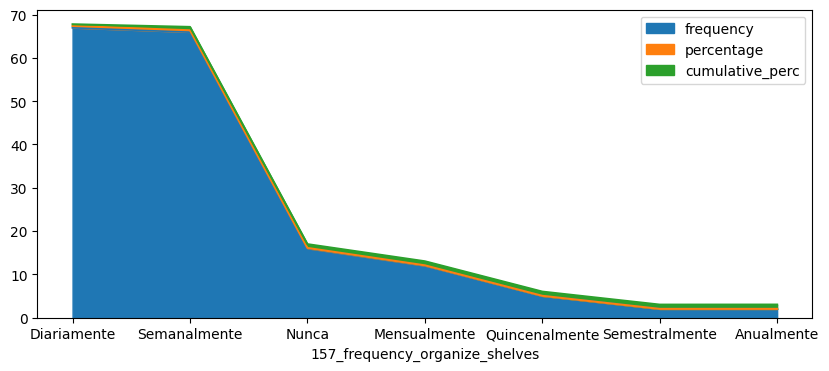

                                                    frequency  percentage  \
189_payment_methods                                                         
Efectivo                                                   69    0.403509   
Efectivo,Tarjeta de débito y/o crédito                     37    0.216374   
Efectivo,Tarjeta de débito y/o crédito,Transfer...         35    0.204678   
Efectivo,Transferencia interbancaria                       26    0.152047   
Aplicación móvil (e.g. CODI),Efectivo,Tarjeta d...          2    0.011696   

                                                    cumulative_perc  
189_payment_methods                                                  
Efectivo                                                   0.403509  
Efectivo,Tarjeta de débito y/o crédito                     0.619883  
Efectivo,Tarjeta de débito y/o crédito,Transfer...         0.824561  
Efectivo,Transferencia interbancaria                       0.976608  
Aplicación móvil (e.g. CODI),Efectivo,Ta

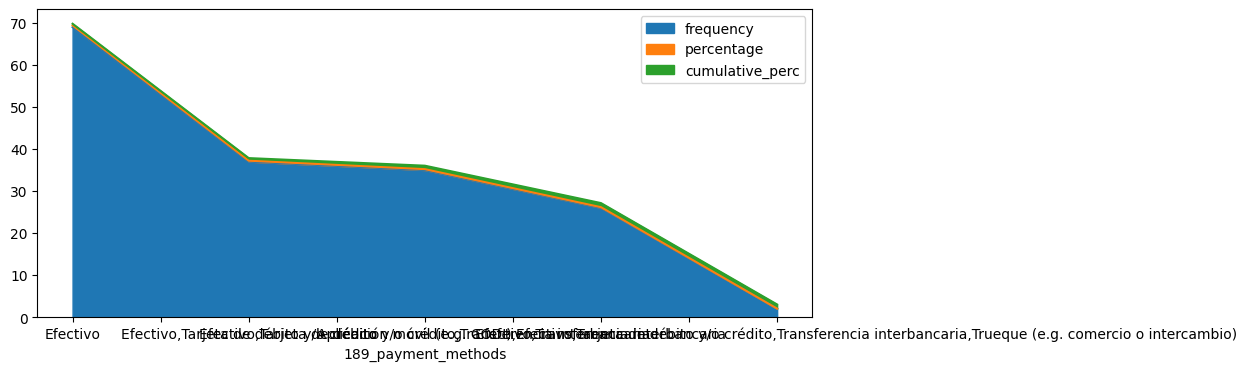

                                                    frequency  percentage  \
210_sales_channels                                                          
WhatsApp                                                   26    0.152047   
Llamada a Teléfono fijo                                    19    0.111111   
Redes sociales (e.g. Facebook, Instagram),WhatsApp         17    0.099415   
Redes sociales (e.g. Facebook, Instagram)                  16    0.093567   
Llamada a Teléfono celular                                 14    0.081871   
Llamada a Teléfono celular,Redes sociales (e.g....         14    0.081871   
Llamada a Teléfono celular,WhatsApp                         8    0.046784   
conocidos paquetes cerrados                                 7    0.040936   
Página web propia                                           6    0.035088   
Llamada a Teléfono fijo,Redes sociales (e.g. Fa...          5    0.029240   
Aplicación móvil (e.g. Rappi, Uber Eats),Llamad...          3    0.017544   

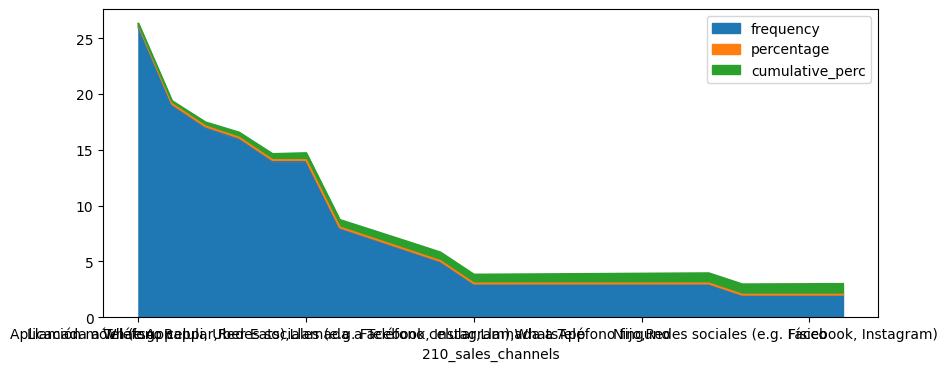

                                      frequency  percentage  cumulative_perc
49_inventory_records                                                        
En papel                                     63    0.368421         0.368421
No lo hago                                   36    0.210526         0.578947
En Excel                                     35    0.204678         0.783626
Software especializado + computadora         24    0.140351         0.923977
En Excel,En papel                             7    0.040936         0.964912
En papel,Mental                               3    0.017544         0.982456


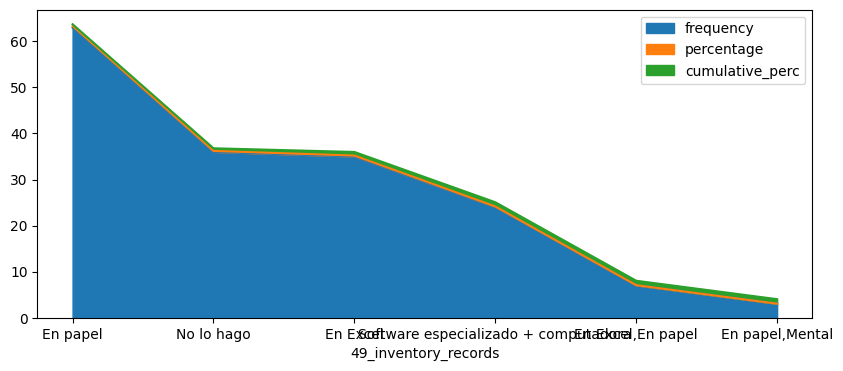

                                 frequency  percentage  cumulative_perc
232_type_of_store                                                      
Grocery store (aka. nanostore)          52    0.304094         0.304094
Micro-restaurant (aka. fondita)         31    0.181287         0.485380
Dairy products                          10    0.058480         0.543860
Cafeteria                                6    0.035088         0.578947
Butcher shop                             6    0.035088         0.614035
Produce (fruits & vegetables)            4    0.023392         0.637427
Handmade products                        2    0.011696         0.649123
Papelería                                2    0.011696         0.660819
objetos                                  2    0.011696         0.672515
Ferretería                               2    0.011696         0.684211


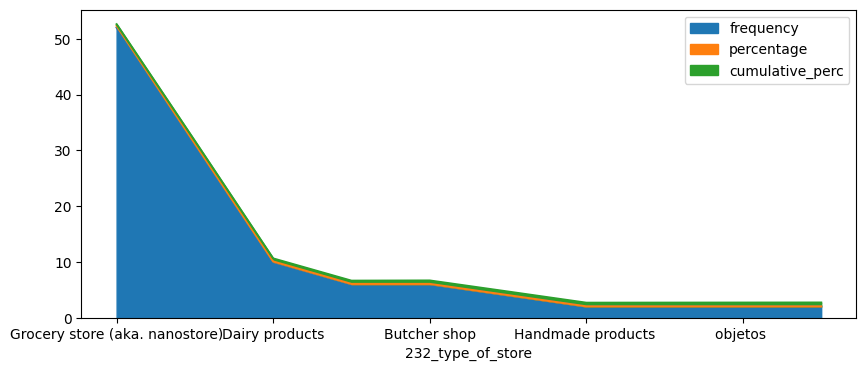

                                                    frequency  percentage  \
18_sales_records                                                            
En papel                                                   79    0.461988   
Software especializado + computadora                       25    0.146199   
No lo hago                                                 20    0.116959   
En Excel                                                   20    0.116959   
Caja registradora (análoga)                                 6    0.035088   
En Excel,En papel                                           6    0.035088   
Contadora                                                   5    0.029240   
Aplicación móvil (i.e. App) + smartphone,Softwa...          3    0.017544   

                                                    cumulative_perc  
18_sales_records                                                     
En papel                                                   0.461988  
Software especializ

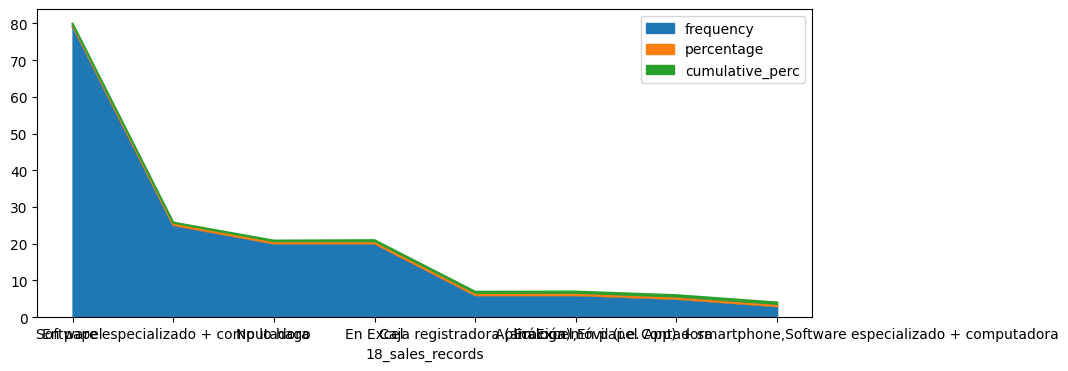

                                                    frequency  percentage  \
184_store_devices                                                           
Smartphone                                                 53    0.309942   
Analog cash register                                       16    0.093567   
POS system (i.e. computer + bar code scanner + ...          9    0.052632   
POS system (i.e. computer + bar code scanner + ...          9    0.052632   
Analog cash register,Smartphone                             8    0.046784   
Security cameras,Smartphone                                 7    0.040936   
Dataphone (i.e. card payments),Security cameras...          5    0.029240   
Security cameras                                            5    0.029240   
Dataphone (i.e. card payments)                              4    0.023392   
POS system (i.e. computer + bar code scanner + ...          4    0.023392   
Dataphone (i.e. card payments),Security cameras             4    0.023392   

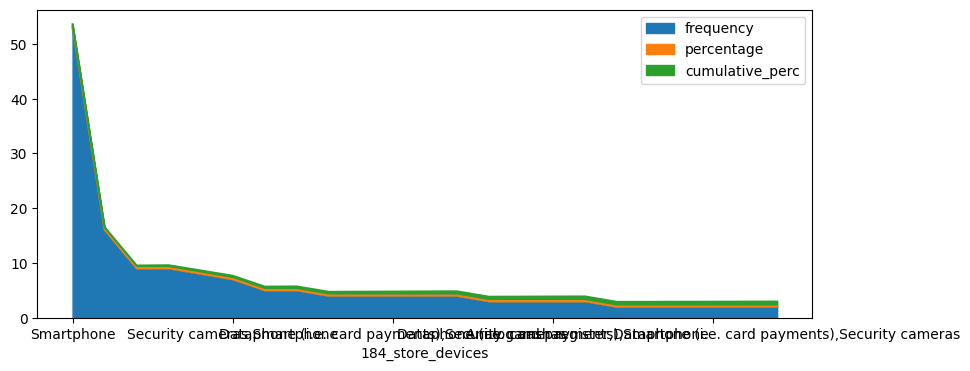

In [27]:

for column in dfarea:
    area(column)
    plt.show()